In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import pandas as pd
import numpy as np
import requests
import time
import hvplot.pandas
import json
import holoviews as hv
from pathlib import Path
from scipy.stats import linregress
import datetime as dt
#from scipy.stats import linregress

# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import geoapify_key

In [6]:
# File to Load (Remember to Change These)
uber_load = Path("Resourses/uber.csv")

# Load the CSV file created in Part 1 into a Pandas DataFrame
uber_df = pd.read_csv(uber_load)

# Display sample data
uber_df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
# Define the New York limits
lat_min = 40.477
lat_max = 45.015
lon_min = -79.7626
lon_max = -71.1851

# Create a new critearia according to New York Limits
pickup_lat = (uber_df['pickup_latitude'] >= lat_min) & (uber_df['pickup_latitude'] <= lat_max)
pickup_lon = (uber_df['pickup_longitude'] >= lon_min) & (uber_df['pickup_longitude'] <= lon_max)
dropoff_lat = (uber_df['dropoff_latitude'] >= lat_min) & (uber_df['dropoff_latitude'] <= lat_max)
dropoff_lon = (uber_df['dropoff_longitude'] >= lon_min) & (uber_df['dropoff_longitude'] <= lon_max)


uber_new = uber_df.loc[pickup_lat & pickup_lon & dropoff_lat & dropoff_lon]

# Drop any rows with null values
uber_new.dropna(how='any')

print(len(uber_new))
print(uber_new.head())

195795
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3  

In [8]:
# Create a new DataFrame call uber_new_df 
uber_filtered = uber_new.copy()

print(len(uber_filtered))
uber_filtered.head()


195795


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
# Convert pickup_datatime to datatime format

uber_filtered['pickup_datetime'] = pd.to_datetime(uber_filtered['pickup_datetime'], utc=True).dt.floor('H')

uber_filtered.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:00:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
#Change the date format '%Y-%m-%d %H:%M:%S +0000 UTC'
uber_filtered['pickup_datetime'] = pd.to_datetime(uber_filtered['pickup_datetime']).dt.strftime('%Y-%m-%d %H:%M:%S +0000 UTC')

uber_filtered.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00 +0000 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00 +0000 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00 +0000 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00 +0000 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:00:00 +0000 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
# File to Load 
openweather_load = Path("Resourses/openweather_2009_2015.csv")

# Load the CSV file created in Part 1 into a Pandas DataFrame
openweather_data=pd.read_csv(openweather_load)



print(len(openweather_data))
openweather_data.head()


60971


,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1230768000,2009-01-01 00:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,-5.79,10000.0,-15.01,-12.79,...,19.0,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
1,1230771600,2009-01-01 01:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,-6.74,10000.0,-15.65,-13.74,...,17.0,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
2,1230775200,2009-01-01 02:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,-6.74,10000.0,-15.65,-13.74,...,17.5,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
3,1230778800,2009-01-01 03:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,-6.74,10000.0,-14.95,-13.74,...,14.4,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
4,1230782400,2009-01-01 04:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,-7.72,10000.0,-15.01,-14.72,...,16.5,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


In [12]:
# Combine the data into a single dataset.  
data_complete=pd.merge(uber_filtered,openweather_data, how = "left", left_on="pickup_datetime", right_on="dt_iso")

print(len(data_complete))
data_complete.head()


209683


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dt,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00 +0000 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1431025200,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00 +0000 UTC,-73.994355,40.728225,-73.994710,40.750325,1,1247860800,...,NaN,NaN,NaN,NaN,NaN,0,500,Rain,light rain,10d
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00 +0000 UTC,-74.005043,40.740770,-73.962565,40.772647,1,1251147600,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00 +0000 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1246003200,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:00:00 +0000 UTC,-73.925023,40.744085,-73.973082,40.761247,5,1409245200,...,11.3,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d


In [13]:
# Data without duplicates
data_without_duplicates = data_complete.drop_duplicates(['Unnamed: 0'])
print(len(data_without_duplicates))
data_without_duplicates.head()

195795


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dt,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00 +0000 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1431025200,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00 +0000 UTC,-73.994355,40.728225,-73.994710,40.750325,1,1247860800,...,NaN,NaN,NaN,NaN,NaN,0,500,Rain,light rain,10d
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00 +0000 UTC,-74.005043,40.740770,-73.962565,40.772647,1,1251147600,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02d
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00 +0000 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1246003200,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:00:00 +0000 UTC,-73.925023,40.744085,-73.973082,40.761247,5,1409245200,...,11.3,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01d


In [14]:
# Check each column exist before deleting them
columns_to_drop = ["key","dt","lat","lon","dt_iso","timezone","sea_level","grnd_level", "wind_gust", "rain_1h", "rain_3h", "snow_1h", "snow_3h","clouds_all","weather_id"]
columns_to_drop = [col for col in columns_to_drop if col in data_without_duplicates.columns]

# Delete the columns
data_without_duplicates = data_without_duplicates.drop(columns_to_drop, axis=1)

# Display sample data
data_without_duplicates.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,city_name,temp,...,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description,weather_icon
0,24238194,7.5,2015-05-07 19:00:00 +0000 UTC,-73.999817,40.738354,-73.999512,40.723217,1,New York,25.73,...,25.06,22.79,25.84,1023,27,6.2,190,Clear,sky is clear,01d
1,27835199,7.7,2009-07-17 20:00:00 +0000 UTC,-73.994355,40.728225,-73.994710,40.750325,1,New York,26.35,...,26.35,26.24,28.29,1009,64,4.1,170,Rain,light rain,10d
2,44984355,12.9,2009-08-24 21:00:00 +0000 UTC,-74.005043,40.740770,-73.962565,40.772647,1,New York,27.13,...,27.74,26.98,29.38,1018,53,5.1,290,Clouds,few clouds,02d
3,25894730,5.3,2009-06-26 08:00:00 +0000 UTC,-73.976124,40.790844,-73.965316,40.803349,3,New York,21.05,...,21.53,20.58,21.24,1007,89,2.6,170,Clouds,few clouds,02n
4,17610152,16.0,2014-08-28 17:00:00 +0000 UTC,-73.925023,40.744085,-73.973082,40.761247,5,New York,26.99,...,26.86,25.53,27.19,1013,40,6.2,330,Clear,sky is clear,01d


In [15]:
# Export the City_Data into a csv
data_without_duplicates.to_csv("output_data/data_complete.csv", index_label="Uber_ID")

# Correlation between rides and temperature

In [16]:
#create a new column call 'Number_rides'
data_without_duplicates.copy()

data_without_duplicates['Number_rides'] = ''

print(len(data_without_duplicates))
data_without_duplicates.head()

195795


,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,city_name,temp,...,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description,weather_icon,Number_rides
0,24238194,7.5,2015-05-07 19:00:00 +0000 UTC,-73.999817,40.738354,-73.999512,40.723217,1,New York,25.73,...,22.79,25.84,1023,27,6.2,190,Clear,sky is clear,01d,
1,27835199,7.7,2009-07-17 20:00:00 +0000 UTC,-73.994355,40.728225,-73.994710,40.750325,1,New York,26.35,...,26.24,28.29,1009,64,4.1,170,Rain,light rain,10d,
2,44984355,12.9,2009-08-24 21:00:00 +0000 UTC,-74.005043,40.740770,-73.962565,40.772647,1,New York,27.13,...,26.98,29.38,1018,53,5.1,290,Clouds,few clouds,02d,
3,25894730,5.3,2009-06-26 08:00:00 +0000 UTC,-73.976124,40.790844,-73.965316,40.803349,3,New York,21.05,...,20.58,21.24,1007,89,2.6,170,Clouds,few clouds,02n,
4,17610152,16.0,2014-08-28 17:00:00 +0000 UTC,-73.925023,40.744085,-73.973082,40.761247,5,New York,26.99,...,25.53,27.19,1013,40,6.2,330,Clear,sky is clear,01d,


In [17]:
#Count number of rides 

data_without_duplicates['Number_rides']=1
data_without_duplicates['temp']=data_without_duplicates['temp'].round(0)
data_without_duplicates.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,city_name,temp,...,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description,weather_icon,Number_rides
0,24238194,7.5,2015-05-07 19:00:00 +0000 UTC,-73.999817,40.738354,-73.999512,40.723217,1,New York,26.0,...,22.79,25.84,1023,27,6.2,190,Clear,sky is clear,01d,1
1,27835199,7.7,2009-07-17 20:00:00 +0000 UTC,-73.994355,40.728225,-73.994710,40.750325,1,New York,26.0,...,26.24,28.29,1009,64,4.1,170,Rain,light rain,10d,1
2,44984355,12.9,2009-08-24 21:00:00 +0000 UTC,-74.005043,40.740770,-73.962565,40.772647,1,New York,27.0,...,26.98,29.38,1018,53,5.1,290,Clouds,few clouds,02d,1
3,25894730,5.3,2009-06-26 08:00:00 +0000 UTC,-73.976124,40.790844,-73.965316,40.803349,3,New York,21.0,...,20.58,21.24,1007,89,2.6,170,Clouds,few clouds,02n,1
4,17610152,16.0,2014-08-28 17:00:00 +0000 UTC,-73.925023,40.744085,-73.973082,40.761247,5,New York,27.0,...,25.53,27.19,1013,40,6.2,330,Clear,sky is clear,01d,1


In [18]:
temp_df=pd.DataFrame(data_without_duplicates['temp'].value_counts().reset_index().values,columns=['temp','rides'])
temp_df=temp_df.sort_index(axis=0,ascending=True)

temp_df.head()

,temp,rides
0,18.0,7403.0
1,21.0,7393.0
2,22.0,7392.0
3,23.0,7085.0
4,11.0,6937.0


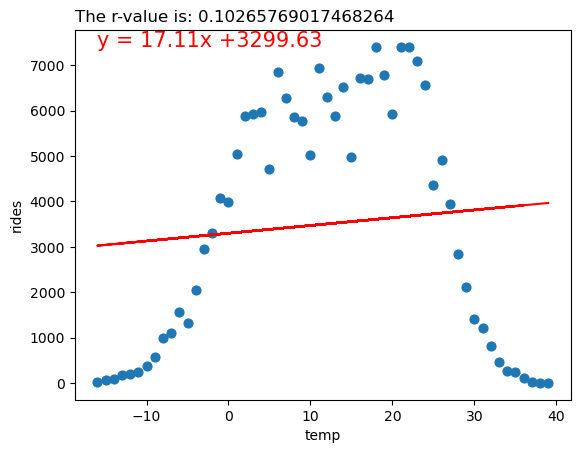

In [19]:
##Number of rides according to the temperature?
# base scatter plot
temp_df.plot.scatter(x='temp', y='rides', s=40)

# Calculate linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(temp_df['temp'], temp_df['rides'])
regress = temp_df['temp'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

# Plot linear regression line and equation
xpos, ypos = (temp_df['temp'].min(), temp_df['rides'].max())  
plt.plot(temp_df['temp'], regress, color='red')
plt.annotate(line_eq, (xpos, ypos), fontsize=15, color='red')

# Add other graph properties
plt.title(f"The r-value is: {rvalue}", loc='left')
plt.xlabel('temp')
plt.ylabel('rides')  

# Save the figure
plt.savefig("output_data/1_correlation.png")

# Display results
plt.show()

In [20]:
##What hours of the day or in what weather are the peak requests? Lina

In [21]:
##Which is the destination with the most rides?Kevin

In [22]:
##Uber Fares depend on different times(day/night/day of week), duration(long/short)? Kevin

In [23]:
##Which kind of city area(downtown, industry,financial central…) has the most uber request? Lina

In [24]:
##Any relation between public transportation line and uber pickup and dropoff location? Kevin

# Is there price surge in relation to time of the day, rush hour or weather?

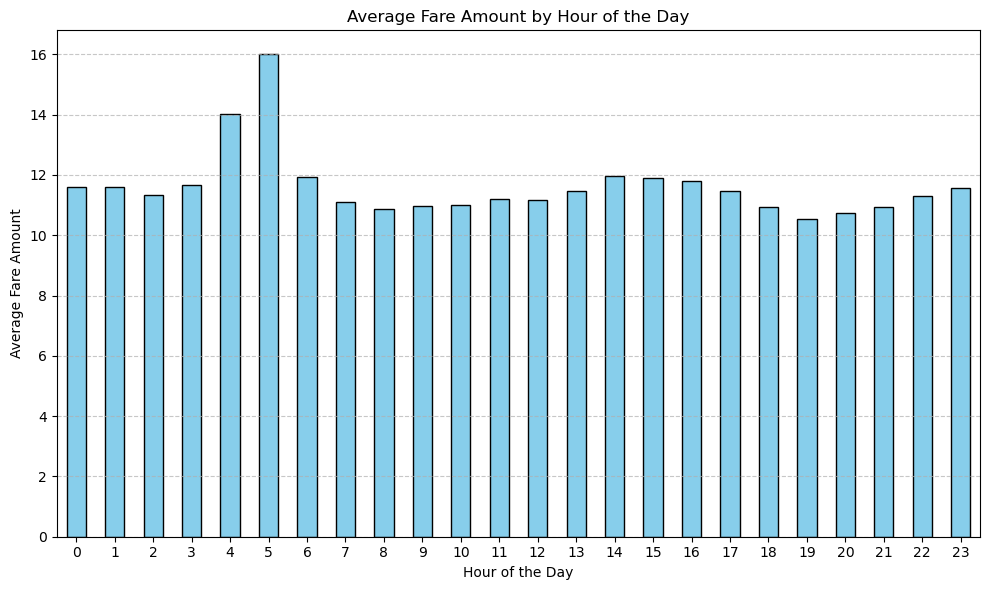

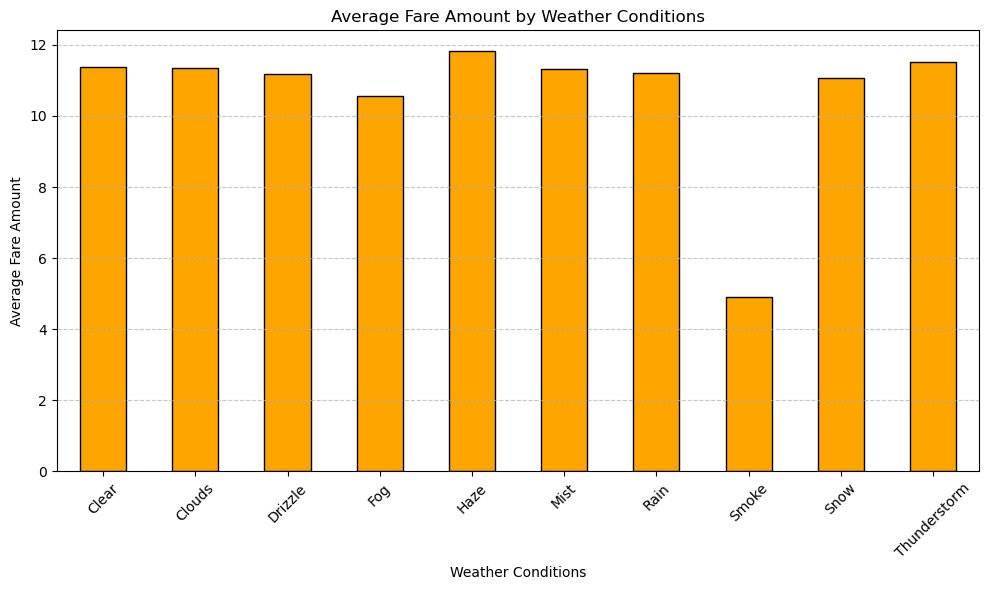

In [25]:
##Price surge? In relation to time of the day, rush hour or weather Zinny

# Convert pickup_datetime to datetime format with specified format
data_without_duplicates['pickup_datetime'] = pd.to_datetime(data_without_duplicates['pickup_datetime'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Extract Time Features
data_without_duplicates['hour_of_day'] = data_without_duplicates['pickup_datetime'].dt.hour
data_without_duplicates['day_of_week'] = data_without_duplicates['pickup_datetime'].dt.dayofweek

# Group the Data and Calculate Relevant Statistics
# Group by hour of the day and calculate the average fare amount for each hour
fare_by_hour = data_without_duplicates.groupby('hour_of_day')['fare_amount'].mean()

# Group by rush hour indicator and calculate the average fare amount
# Group by weather conditions and calculate the average fare amount for each weather condition
fare_by_weather = data_without_duplicates.groupby('weather_main')['fare_amount'].mean()

# Visualize the Results
# Plot average fare amount by hour of the day
plt.figure(figsize=(10, 6))
fare_by_hour.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Hour of the Day')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/2_average_fare_amount_by_hour.png")
plt.show()

# Plot average fare amount by weather conditions
plt.figure(figsize=(10, 6))
fare_by_weather.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Weather Conditions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Save the figure
plt.savefig("output_data/3_average_fare_amount_by_weather.png")
plt.show()


## Distribution of the rides by weekdays?

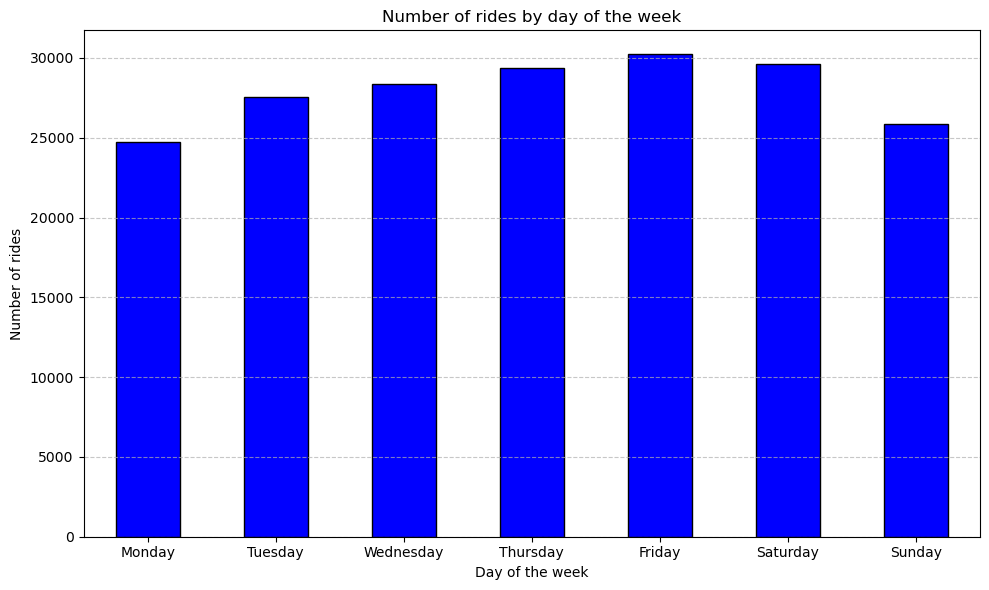

In [26]:
##Distribution of the rides by weekdays? Ricardo

# Convert pickup_datetime to datetime format with specified format
data_without_duplicates['pickup_datetime'] = pd.to_datetime(data_without_duplicates['pickup_datetime'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Extract Time Features
data_without_duplicates['day_of_week'] = data_without_duplicates['pickup_datetime'].dt.day_name()

# Organice in a logical order (Monday a Friday)
day_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_without_duplicates['day_of_week'] = pd.Categorical(data_without_duplicates['day_of_week'], categories=day_week, ordered=True)
data_without_duplicates.sort_values(by='day_of_week', inplace=True)

#Group the Data by day of the week and count Average Rides
rides_by_day = data_without_duplicates.groupby('day_of_week')['Number_rides'].count()

# Visualize the Results
# Plot average fare amount by hour of the day
plt.figure(figsize=(10, 6))
rides_by_day.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Day of the week')
plt.ylabel('Number of rides')
plt.title('Number of rides by day of the week')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Save the figure
plt.savefig("output_data/4_number_rides_by_day.png")
plt.show()


 # Do people avoid rides on sunny days ?

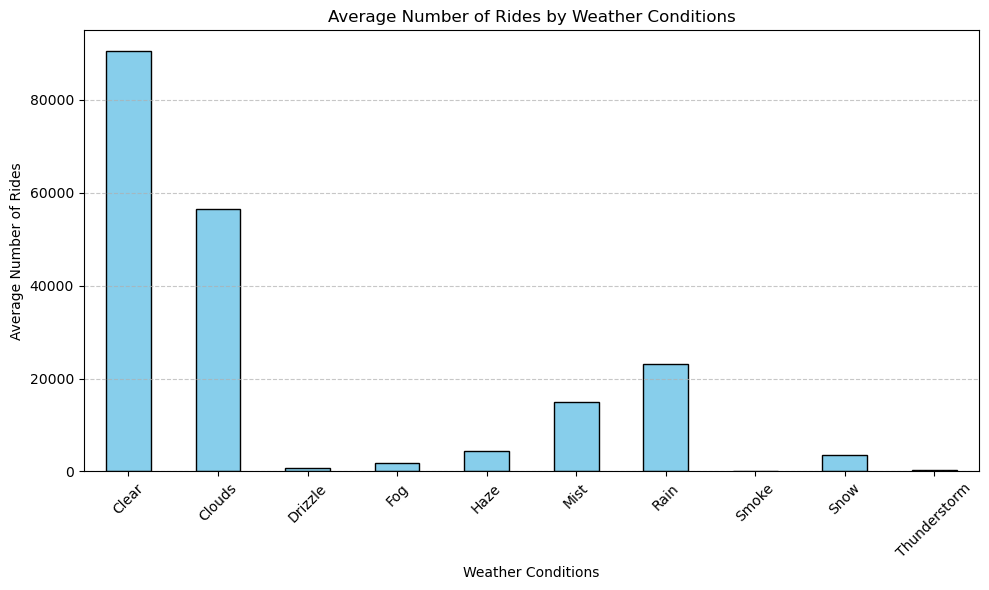

In [27]:
#Do people avoid rides on sunny days? Zinny

#Group the Data by Weather Conditions and Calculate Average Rides
rides_by_weather = data_without_duplicates.groupby('weather_main')['pickup_datetime'].count()

#Visualize the Results
plt.figure(figsize=(10, 6))
rides_by_weather.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Number of Rides')
plt.title('Average Number of Rides by Weather Conditions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Save the figure
plt.savefig("output_data/5_average_numberof_rides_by_weather.png")
plt.show()


## What hours of the day are the peak requests?

In [28]:
uber_new1 = uber_new.copy()

# Check types from csv
#tipyofdata = df.dtypes
#print(tipyofdata)

#convert from object to DateTime
uber_new1['pickup_datetime'] = pd.to_datetime(uber_new1['pickup_datetime'])

#get the day, month and year of the ride

uber_new1["weekday"] = uber_new1.loc[:,"pickup_datetime"].dt.weekday
uber_new1["hour"] = uber_new1.loc[:,"pickup_datetime"].dt.hour
uber_new1["weekdayname"] = uber_new1.loc[:,"pickup_datetime"].dt.day_name()
uber_new1["year"] = uber_new1.loc[:,"pickup_datetime"].dt.year
uber_new1["month"] = uber_new1.loc[:,"pickup_datetime"].dt.month


uber_new1

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,hour,weekdayname,year,month
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,3,19,Thursday,2015,5
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,4,20,Friday,2009,7
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0,21,Monday,2009,8
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,4,8,Friday,2009,6
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,3,17,Thursday,2014,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,6,10,Sunday,2012,10
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,4,1,Friday,2014,3
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,0,Monday,2009,6
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2,14,Wednesday,2015,5


In [29]:
uber_df = uber_new1.groupby(['weekdayname', 'hour']).size().reset_index(name='count').sort_values(by=["weekdayname","count"], ascending=[True,False])

uber_df

,weekdayname,hour,count
19,Friday,19,2005
22,Friday,22,1779
18,Friday,18,1772
20,Friday,20,1768
23,Friday,23,1767
...,...,...,...
145,Wednesday,1,505
146,Wednesday,2,353
149,Wednesday,5,238
147,Wednesday,3,219


In [30]:
# Group by ranges of hours
# Establish the bins 
uber_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
labels = ["0-2","2-4","4-6","6-8","8-10","10-12","12-14","14-16","16-18","18-20","20-22","22-24"]
uber_new1["Range per hour"] = pd.cut(uber_new1["hour"], uber_bins, labels=labels, include_lowest=True)

uber_new1

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,hour,weekdayname,year,month,Range per hour
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,3,19,Thursday,2015,5,18-20
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,4,20,Friday,2009,7,18-20
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0,21,Monday,2009,8,20-22
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,4,8,Friday,2009,6,6-8
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,3,17,Thursday,2014,8,16-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,6,10,Sunday,2012,10,8-10
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,4,1,Friday,2014,3,0-2
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,0,Monday,2009,6,0-2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2,14,Wednesday,2015,5,12-14


In [31]:
#  Calculate averages for the desired columns. 
uber_fare = uber_new1.groupby(["Range per hour"])["fare_amount"].mean()
uber_passenger = uber_new1.groupby(["Range per hour"])["passenger_count"].mean()
uber_count = uber_new1.groupby(["Range per hour"])["Unnamed: 0"].count()

# Assemble into DataFrame

uber_summary = pd.DataFrame({"Average Uber Fare":uber_fare,"Average Uber Passenger": uber_passenger,"Rides": uber_count})

max_rides_value = uber_summary["Rides"].max()
row_max = uber_summary.loc[uber_summary['Rides'] == max_rides_value]

# Display results
uber_summary

,Average Uber Fare,Average Uber Passenger,Rides
Range per hour,,,
0-2,11.536051,1.756889,17782
2-4,12.667104,1.753136,5501
4-6,13.244532,1.526686,5977
6-8,10.979675,1.573191,15972
8-10,10.981029,1.612952,17928
10-12,11.184610,1.672101,18954
12-14,11.713827,1.675938,19379
14-16,11.856813,1.696551,17512
16-18,11.173427,1.701920,21350


                Average Uber Fare  Average Uber Passenger  Rides
Range per hour                                                  
18-20                   10.644481                1.711134  23845


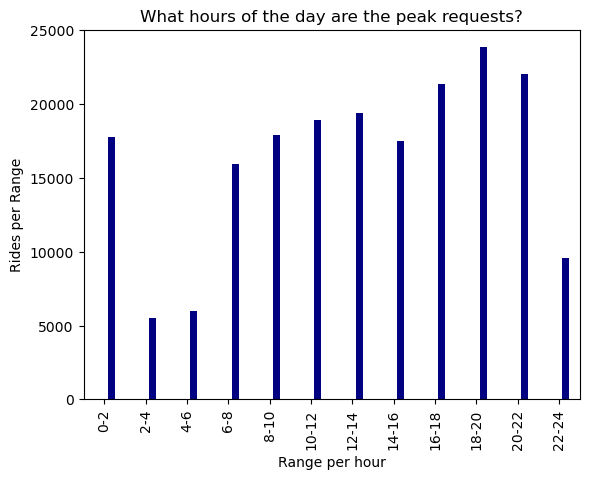

In [32]:
print(row_max)
color = ['navy']
width = 0.5
uber_summary.plot(kind="bar", ylabel='Rides per Range', legend=False, title='What hours of the day are the peak requests?',color=color, width=width)

# Save the figure
plt.savefig("output_data/Fig1.png")
plt.show()

## Which kind of city area has the most uber request?

In [33]:
# get the area of the city with the highest number of requests in the peak request hour

uber_new2 = uber_new1[uber_new1['Range per hour'] == "18-20"]
uber_new2

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,hour,weekdayname,year,month,Range per hour
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,3,19,Thursday,2015,5,18-20
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,4,20,Friday,2009,7,18-20
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,3,19,Thursday,2012,3,18-20
28,46387690,2009-05-06 20:06:23.0000003,4.9,2009-05-06 20:06:23+00:00,-73.977780,40.763656,-73.989486,40.772966,1,2,20,Wednesday,2009,5,18-20
32,33836728,2013-02-11 19:09:00.000000252,10.5,2013-02-11 19:09:00+00:00,-73.982085,40.771387,-73.959610,40.769445,1,0,19,Monday,2013,2,18-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199955,10654286,2010-12-12 20:54:04.0000004,7.7,2010-12-12 20:54:04+00:00,-73.987290,40.747218,-74.006355,40.739712,2,6,20,Sunday,2010,12,18-20
199958,14822284,2012-08-25 20:25:00.00000042,15.7,2012-08-25 20:25:00+00:00,-73.995317,40.736752,-73.977312,40.784565,5,5,20,Saturday,2012,8,18-20
199960,3291606,2014-12-31 20:57:05.0000001,24.5,2014-12-31 20:57:05+00:00,-73.920354,40.847114,-73.994382,40.761012,1,2,20,Wednesday,2014,12,18-20
199975,12171808,2009-11-20 19:00:30.0000002,8.5,2009-11-20 19:00:30+00:00,-73.990036,40.741504,-74.005305,40.715368,1,4,19,Friday,2009,11,18-20


In [34]:

count_days = uber_new2['weekday'].value_counts()
max_weekday = count_days.idxmax()
print(max_weekday)


3


In [37]:
#select the day of the week with the highest request within the peak hour with the highest request
uber_new3 = uber_new2.copy()[uber_new2.copy()['weekday'] == max_weekday]

#include the name of the area according to latitude and longitude
from concurrent.futures import ThreadPoolExecutor

# function to obtain NY district

def get_district(lat, long):
    url = f'https://api.geoapify.com/v1/geocode/reverse?lat={lat}&lon={long}&apiKey={geoapify_key}'
    response = requests.get(url)
    data = response.json()
    if 'features' in data and data['features']:
        properties = data['features'][0]['properties']
        if 'suburb' in properties:
            return properties['suburb']
        else:
            return None
    else:
        return None
        
# Create a list of latitudes and longitudes
latitudes = uber_new3['pickup_latitude'].tolist()
longitudes = uber_new3['pickup_longitude'].tolist()

# Use ThreadPoolExecutor to process the requests in parallel,to reduce the processing time, since there are approximately 3,000 records
with ThreadPoolExecutor() as executor:
    results = list(executor.map(get_district, latitudes, longitudes))

# Add the results to the DataFrame
uber_new3['zone'] = results
uber_new3     

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,hour,weekdayname,year,month,Range per hour,zone
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,3,19,Thursday,2015,5,18-20,West Village
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,3,19,Thursday,2012,3,18-20,Manhattan
55,38092793,2014-11-13 20:12:25.0000005,11.0,2014-11-13 20:12:25+00:00,-73.958903,40.815239,-73.980862,40.782610,1,3,20,Thursday,2014,11,18-20,Manhattan
72,28370429,2012-06-28 20:10:44.0000002,4.1,2012-06-28 20:10:44+00:00,-73.994554,40.721011,-73.989079,40.722964,2,3,20,Thursday,2012,6,18-20,Manhattan
77,39891441,2012-04-05 20:21:06.0000007,11.3,2012-04-05 20:21:06+00:00,-73.981496,40.768334,-73.956104,40.804763,1,3,20,Thursday,2012,4,18-20,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199765,40098060,2009-05-21 20:00:00.00000089,3.7,2009-05-21 20:00:00+00:00,-73.993272,40.742065,-73.987967,40.749318,1,3,20,Thursday,2009,5,18-20,Flatiron District
199772,21461187,2011-12-15 19:26:57.0000006,8.1,2011-12-15 19:26:57+00:00,-73.997099,40.747272,-73.987394,40.770690,1,3,19,Thursday,2011,12,18-20,Manhattan
199845,5262170,2010-01-28 20:30:00.000000193,4.1,2010-01-28 20:30:00+00:00,-73.996368,40.737863,-73.989018,40.748653,1,3,20,Thursday,2010,1,18-20,Manhattan
199877,34348619,2010-06-24 19:16:00.000000153,8.9,2010-06-24 19:16:00+00:00,-73.961570,40.755888,-73.982695,40.764120,1,3,19,Thursday,2010,6,18-20,Manhattan


In [38]:
# day of the week with the highest request within the peak hour with the highest request
uber_earnings2 = uber_new3.groupby(["weekdayname"])["fare_amount"].sum()
uber_earnings2

weekdayname
Thursday    40646.96
Name: fare_amount, dtype: float64

In [39]:
#  Calculate averages for the desired columns. 
uber_count = uber_new3.groupby(["zone"])["zone"].count()
uber_earnings = uber_new3.groupby(["zone"])["fare_amount"].sum()


# Assemble into DataFrame

uber_driver = pd.DataFrame ({"Uber Count":uber_count,"Total Fare": uber_earnings, "Earning By Ride": (uber_earnings/uber_count).round(1)})
total_rides = uber_driver["Uber Count"].sum()
# print(total_rides)
uber_driver

,Uber Count,Total Fare,Earning By Ride
zone,,,
Astoria,1,6.50,6.5
Battery Park City,6,66.90,11.2
Briarwood,1,18.90,18.9
Brooklyn,37,366.00,9.9
Brooklyn Heights,1,8.90,8.9
Central Park,4,52.70,13.2
Chelsea,70,672.00,9.6
Chinatown,5,44.00,8.8
Civic Center,1,13.30,13.3


In [40]:
# Assemble the new data by top 3 into a DataFrame 

top3_zone = uber_driver.nlargest(3, 'Uber Count')
top3_df = pd.DataFrame(top3_zone)

# Display results
top3_df

,Uber Count,Total Fare,Earning By Ride
zone,,,
Manhattan,2904,29020.87,10.0
Upper East Side,112,944.50,8.4
Queens,111,3089.09,27.8


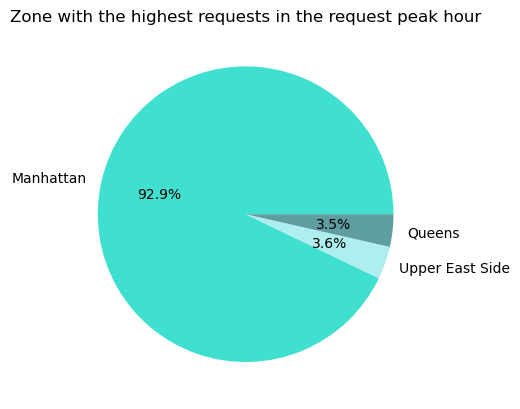

In [41]:
#PLot the areas with the highest number of rides

# Labels for the sections of our pie chart
labels = top3_df.index

# The values of each section of the pie chart
sizes = top3_df['Uber Count']

# The colors of each section of the pie chart
colors = ["turquoise", "paleturquoise", "cadetblue"]

# Creates the pie chart based upon the values above 
# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=0)
plt.title('Zone with the highest requests in the request peak hour')
# Save the figure
plt.savefig("output_data/Fig2.png")
plt.show()

In [42]:
# the top 5 zone with the best Total Fare

top_fare = uber_driver.nlargest(5, 'Total Fare')
top6_df = pd.DataFrame(top_fare)

# Display results
top6_df

,Uber Count,Total Fare,Earning By Ride
zone,,,
Manhattan,2904,29020.87,10.0
Queens,111,3089.09,27.8
Upper East Side,112,944.50,8.4
Midtown West,89,842.93,9.5
Queens County,20,772.03,38.6


In [43]:
# the top 5 zone with the best earning by ride

top5_earning = uber_driver.nlargest(5, 'Earning By Ride')
top5_df = pd.DataFrame(top5_earning)

# Display results
top5_df

,Uber Count,Total Fare,Earning By Ride
zone,,,
Queens County,20,772.03,38.6
John F. Kennedy International Airport District,9,274.84,30.5
LaGuardia Airport District,6,171.26,28.5
Queens,111,3089.09,27.8
Downtown Brooklyn,2,42.50,21.2


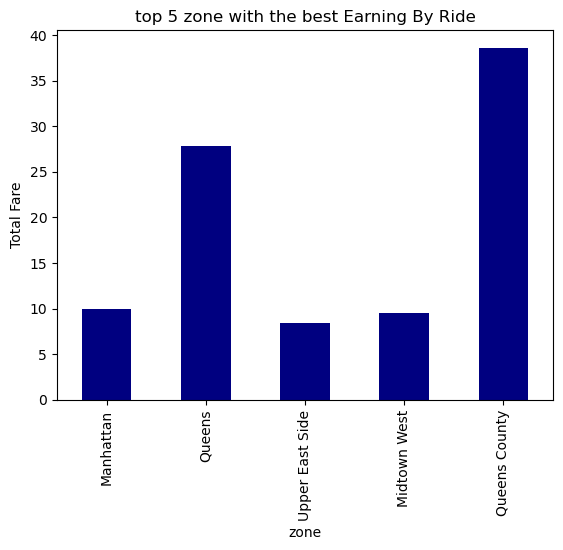

In [44]:
Graph1= top6_df['Earning By Ride']

color = ['navy']
width = 0.5
Graph1.plot(kind="bar", ylabel='Total Fare', legend=False, title='top 5 zone with the best Earning By Ride',color=color, width=width)



# Save the figure
plt.savefig("output_data/Fig4.png")
plt.show()